In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json
import time

from hiive.mdptoolbox import mdp, example
from mdp import run_iterations, q_learning, run_qlearnings

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

RANDOM_SEED = 1994540101
np.random.seed(RANDOM_SEED) # keep results consistent

In [2]:
P, R = example.forest(S=20, r1=4, r2=2, p=0.1, is_sparse=False)

Problem: Forest
Function: Q-Learning_different_epsilons
Policies for different alphas values:
{'epsilon: 0.95': (0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0), 'epsilon: 0.9': (0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0)}


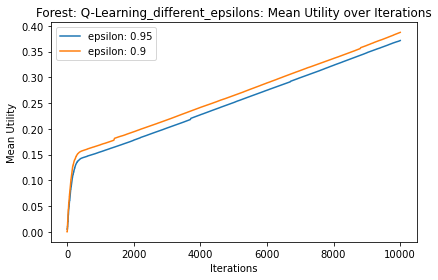

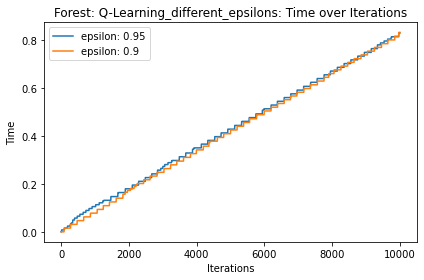

In [4]:
rewards, times, policies = run_qlearnings(P, R, params=[0.95, 0.9], n_iter=10000, param_alpha=False, show=True)